In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn.preprocessing import MinMaxScaler

sx=MinMaxScaler()
sy=MinMaxScaler()

scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [5]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

<h1>Batch GD</h1>

In [6]:
w=np.ones(shape=(2))

In [7]:
# np.dot(w,scaled_x.T)

In [8]:
a=np.array([1,2,3])
b=np.array([10,5,7])
a-b

array([-9, -3, -4])

In [9]:
np.mean(np.square(a-b))

np.float64(35.333333333333336)

In [10]:
def batch_gd(x,y_true,epochs,learning_rate=0.01):
  number_of_features=x.shape[1]
  w=np.ones(shape=(number_of_features))
  b=0
  total_samples=x.shape[0]

  cost_list=[]
  epoch_list=[]

  for i in range(epochs):

    y_predicted=np.dot(w,x.T)+b #w1*area w2 * bedrooms

    w_grad=(1/total_samples)*np.dot(x.T,(y_predicted-y_true))
    b_grad=(1/total_samples)*np.sum(y_predicted-y_true)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost=np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.76105393, 0.73123417]),
 np.float64(-0.2804780207993739),
 np.float64(0.010381267271798262))

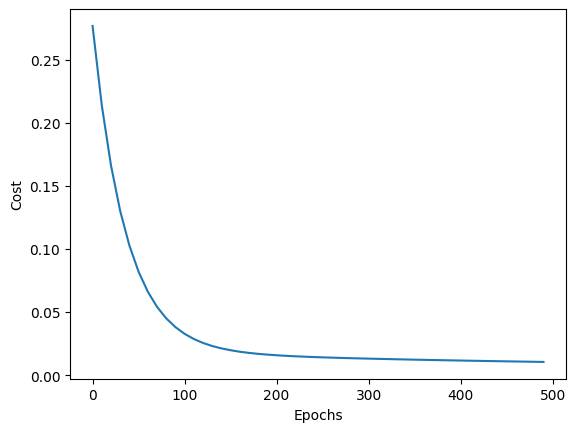

In [11]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list)

In [13]:
sx.transform([[2600,4]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [19]:
sy.inverse_transform([[1,0]])

array([[167.,  32.]])

In [27]:
def predict(area,bedrooms,w,b):
  scaled_x=sx.transform([[area,bedrooms]])[0]

  scaled_price = w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(131.9439972405552)

In [31]:
predict(5000,2,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(167.61378443614817)

<h1>Stochastic GD</h1>

In [33]:
import random
random.randint(0,5)

4

In [40]:
def stochatic_gradient_desent(x,y_true,epochs,learning_rate=0.01):
  number_of_features=x.shape[1]
  #numpya aray with 1 row and columns equal to number of feature. In
  #our case number_of_feature=3 (area,bedroom and age)
  w=np.ones(shape=(number_of_features))
  b=0
  total_samples=x.shape[0]

  cost_list=[]
  epoch_list=[]

  for i in range(epochs):
    random_index=random.randint(0,total_samples-1)
    sample_x=x[random_index]
    sample=y_true[random_index]
    y_predicted=np.dot(w,sample_x.T)+b #w1*

    w_grad=(1/total_samples)*np.dot(sample_x.T,(y_predicted-sample))
    b_grad=(1/total_samples)*np.sum(y_predicted-sample)

    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad

    cost=np.mean(np.square(sample-y_predicted))

    if i%100==0: #at every 100th iteration recore the cost and epoch value
      cost_list.append(cost)
      epoch_list.append(i)
  return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochatic_gradient_desent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd,b_sgd,cost_sgd

(array([0.91750455, 0.89786578]),
 np.float64(-0.17090316929497984),
 np.float64(0.10946052648683229))

In [41]:
w,b,cost

(array([0.76105393, 0.73123417]),
 np.float64(-0.2804780207993739),
 np.float64(0.010381267271798262))

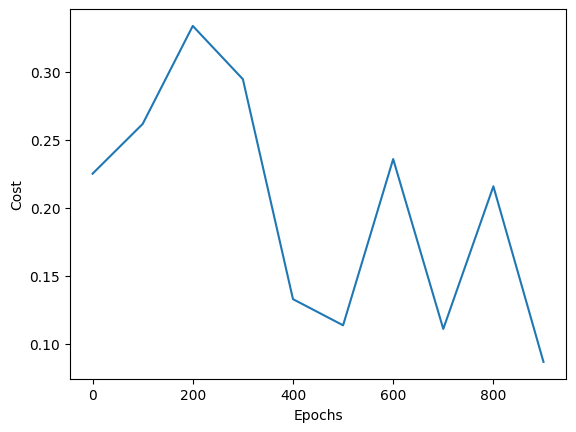

In [45]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [46]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(176.717536322632)